<a href="https://colab.research.google.com/github/0204hyoj/Scikit-learn-/blob/main/air_pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#csv파일 읽어오기
import pandas as pd

X_test = pd.read_csv("/content/sample_data/X_test.csv")
X_train = pd.read_csv("/content/sample_data/X_train.csv")
y_test = pd.read_csv("/content/sample_data/y_test.csv")
y_train = pd.read_csv("/content/sample_data/y_train.csv")

#예측할 종속변수가 숫자이므로 회귀분석 사용

In [ ]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

logist = LogisticRegression()
logist.fit(X_train, y_train)
y_pred1 = logist.predict_proba(X_test)

auc_score1 = roc_auc_score(y_test, y_pred1[:,1])

print("정확도 : ", auc_score1)

정확도 :  0.8979179365435822


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#SVM
from sklearn.svm import SVR
from sklearn.metrics import roc_auc_score

svclassifier = SVR(kernel = 'linear')
svclassifier.fit(X_train, y_train)
y_pred2 = svclassifier.predict(X_test)

auc_score2 = roc_auc_score(y_test,y_pred2)

print("정확도 : ", auc_score2)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


정확도 :  0.8848128067755286


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

rand_clf = RandomForestClassifier(criterion='entropy', bootstrap=True, random_state=42, max_depth=5)

rand_clf.fit(X_train, y_train)
y_pred3 = rand_clf.predict(X_test)

auc_score3 = roc_auc_score(y_test, y_pred3)

print("정확도 : ", auc_score3)

<ipython-input-5-79ef779758e4>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_clf.fit(X_train, y_train)


정확도 :  0.9016152834365275


In [ ]:
#XG Boost
import xgboost
from sklearn.metrics import roc_auc_score

xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train)
y_pred4 = xgb.predict(X_test)

auc_score4 = roc_auc_score(y_test, y_pred4)

print("정확도 : ", auc_score4)

정확도 :  0.9367039876808572


In [ ]:
#GBM
from sklearn.ensemble import GradientBoostingClassifier
import time
from sklearn.metrics import roc_auc_score

start_time = time.time()
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)
y_pred5 = gb.predict(X_test)

auc_score5 = roc_auc_score(y_test, y_pred5)

print("정확도 : ", auc_score5)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


정확도 :  0.8909884187225305


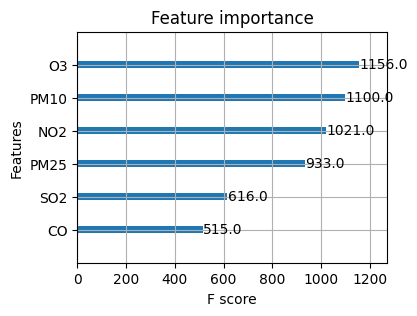

In [ ]:
#XG Boost의 정확도가 가장높음
#XG Boost 모델의 중요도 그래프
from xgboost.plotting import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4,3))
plot_importance(xgb, ax=ax)
plt.show()

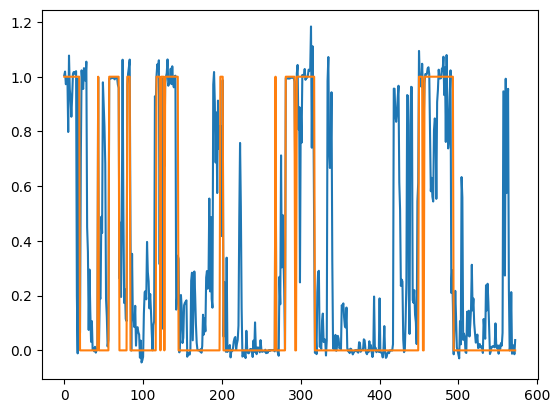

In [ ]:
plt.plot(y_pred4)
plt.plot(y_test)
plt.show()